In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data_train = pd.read_csv('./dataset/train.csv')
data_test = pd.read_csv('./dataset/test.csv')

In [3]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data_test.shape

(418, 11)

In [6]:
data_train.shape

(891, 12)

In [7]:
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Mari kita definisikan dari setiap columns pada data train di atas
* Survived: Survival
* Pclass: Ticket class
* Sex: Sex
* Name : Name of passenger
* Age: Age in years
* Sibsp: of siblings / spouses aboard the Titanic	
* Parch: of parents / children aboard the Titanic	
* Ticket: Ticket number	
* Fare:	Passenger fare	
* Cabin: Cabin number	
* Embarked: Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

# EDA

In [8]:
def na_vals(df):
    na_vals = df.isnull().sum()
    na_cols = na_vals.drop(na_vals[na_vals==0].index, axis='index').sort_values(ascending=False)
    return na_cols

def missing_na_vals(df, asframe=False, tresshold=0.25):
        na_vals = df.isnull().sum()
        percent = (na_vals / df.isnull().count()).sort_values(ascending=False)
        missing_data_df = pd.concat([na_vals,percent],axis='columns',keys=['Total', 'Percent'])
        missing_data_df = missing_data_df.drop(missing_data_df[na_vals==0].index, axis='index').sort_values(by='Percent',ascending=False)
        cols_naPercentage = lambda df:df[df['Percent'] > tresshold].index

        if asframe:
            return missing_data_df
        else:
            return cols_naPercentage(missing_data_df)
        
na_cols_train = na_vals(data_train)
na_cols_test = na_vals(data_test)

train_prior_cols = missing_na_vals(data_train, tresshold=0.25)
test_prior_cols = missing_na_vals(data_test, tresshold=0.25)

print(f'Test set: \n{na_cols_test} \n\nTrain set:\n{na_cols_train}')

Test set: 
Cabin    327
Age       86
Fare       1
dtype: int64 

Train set:
Cabin       687
Age         177
Embarked      2
dtype: int64


In [9]:
missing_na_vals(data_train, asframe=True)

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245


In [10]:
missing_na_vals(data_test, asframe=True)

,Total,Percent
Cabin,327,0.782297
Age,86,0.205742
Fare,1,0.002392


In [11]:
train_prior_cols

Index(['Cabin'], dtype='object')

In [12]:
test_prior_cols

Index(['Cabin'], dtype='object')

In [13]:
new_data_train = data_train.drop(columns=train_prior_cols, axis='columns')
new_data_test = data_test.drop(columns=test_prior_cols, axis='columns')

In [14]:
new_data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [15]:
new_data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [16]:
def diagnose_set(df):
    print(f'shape: {df.shape}\n')
    print(f'columns: {df.columns}\n')
    print(f'null vals : \n{na_vals(df)}\n')
    print(f'info \n {df.info()}\n')
    
    print('unique values sum :')
    print(df.nunique())
    
    print('\nunique values:')
    for col in df.columns:
        print(f'{col}: {df[col].unique()}')
    
    return df.head()

In [17]:
diagnose_set(new_data_train)

shape: (891, 11)

columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

null vals : 
Age         177
Embarked      2
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
info 
 None

unique values sum :
PassengerId    891
Sur

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
diagnose_set(new_data_test)

shape: (418, 10)

columns: Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

null vals : 
Age     86
Fare     1
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB
info 
 None

unique values sum :
PassengerId    418
Pclass           3
Name           418
Sex              2
Age       

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [19]:
def fill_na_vals(df, target_cols, mean=False):
    for col in target_cols:
        if df[col].dtype == object:
            df[col] = df[col].fillna(df[col].mode()[0])
        elif mean:
            df[col] = df[col].fillna(df[col].mean())
        else:
            df[col] = df[col].fillna(df[col].median())
    return df

na_vals_train = na_vals(new_data_train).index
na_vals_test = na_vals(new_data_test).index

new_data_train = fill_na_vals(new_data_train, na_vals_train)
new_data_test = fill_na_vals(new_data_test, na_vals_test)

In [20]:
na_vals(new_data_train)

Series([], dtype: int64)

In [21]:
na_vals(new_data_test)

Series([], dtype: int64)

In [22]:
def drop_useless_cols(df, target_cols):
    return df.drop(columns=target_cols, axis='columns')

cols = ['PassengerId', 'Name', 'Ticket']
new_data_train = drop_useless_cols(new_data_train, cols)
new_data_test = drop_useless_cols(new_data_test, cols)

In [23]:
new_data_train.shape

(891, 8)

In [24]:
new_data_test.shape

(418, 7)

In [25]:
new_data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [26]:
new_data_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [27]:
new_data_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


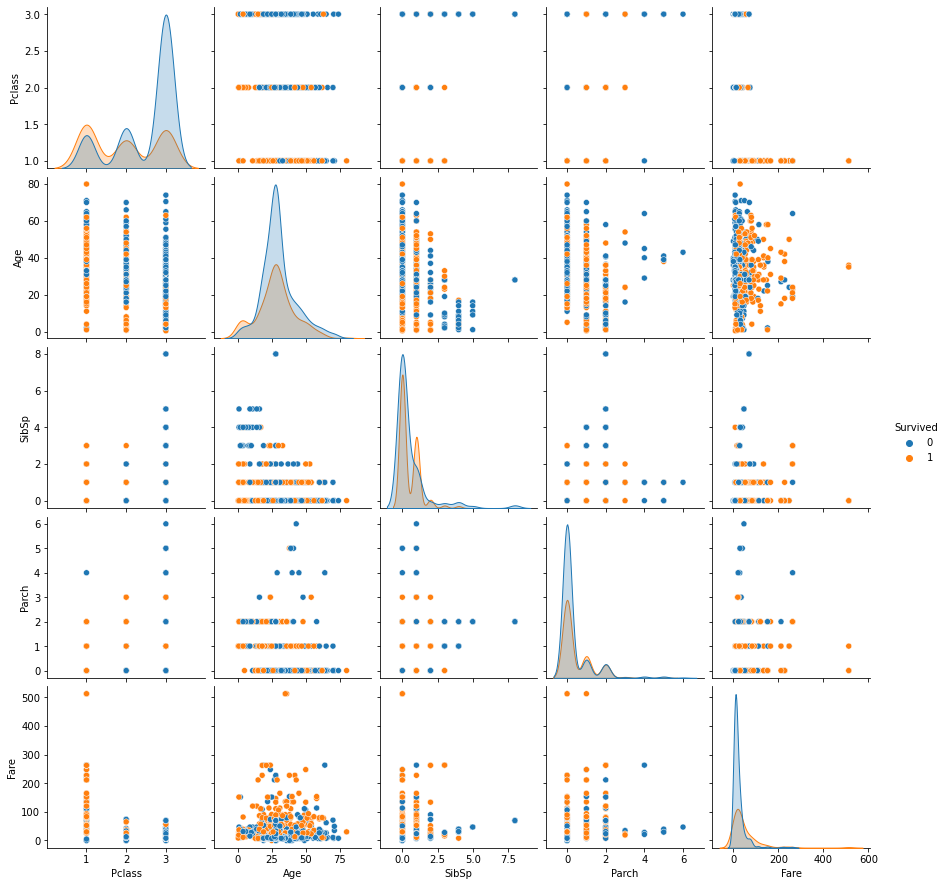

In [28]:
num_cols = new_data_train.select_dtypes(object).columns
num_df = new_data_train.drop(columns=num_cols, axis='columns')

sns.pairplot(data=num_df, hue='Survived')
plt.show()

In [29]:
def remove_outlier(df, target_cols, method='zscore'):
    new_df = df.copy(deep=True)
    if method == 'zscore':
        zscore = (new_df['Fare'] - new_df['Fare'].mean()) / new_df['Fare'].std()
        new_df['zscore'] = np.abs(zscore)
        new_df = new_df[new_df['zscore'] < 3]
        new_df = new_df.drop(columns='zscore')
        return new_df
    elif method == 'iqr':
        Q1, Q3 = new_df[target_cols].quantile([.25, .75])
        IQR = Q3 - Q1
        lower_limit, upper_limit = Q1 - 1.5*IQR, Q3 + 1.5*IQR
        new_df = new_df[new_df[target_cols].between(lower_limit, upper_limit)] 
        return new_df
    
new_data_train = remove_outlier(new_data_train, 'Fare', 'iqr')
new_data_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,775.000000,775.00000,775.000000,775.000000,775.000000,775.000000
mean,0.339355,2.48000,28.748710,0.437419,0.340645,17.822091
std,0.473796,0.73439,12.782123,0.899838,0.785914,13.578085
min,0.000000,1.00000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.00000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.00000,28.000000,0.000000,0.000000,13.000000
75%,1.000000,3.00000,34.000000,1.000000,0.000000,26.000000
max,1.000000,3.00000,80.000000,5.000000,6.000000,65.000000


In [30]:
new_data_train.shape

(775, 8)

In [31]:
cols_object = new_data_train.select_dtypes(object).columns
cols_object

Index(['Sex', 'Embarked'], dtype='object')

In [32]:
new_data_train = pd.get_dummies(data=new_data_train, columns=cols_object)

In [33]:
new_data_test = pd.get_dummies(data=new_data_test, columns=cols_object)

In [34]:
new_data_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
5,0,3,28.0,0,0,8.4583,0,1,0,1,0


In [35]:
new_data_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


In [36]:
def scaling(df):
    col_list = []
    for col in df.columns:
        if len(df[col].unique())>2:
            col_list.append(col)
    return col_list

In [37]:
scaler_train = MinMaxScaler()
new_data_train[scaling(new_data_train)] = scaler_train.fit_transform(new_data_train[scaling(new_data_train)])

scaler_test = MinMaxScaler()
new_data_test[scaling(new_data_test)] = scaler_train.fit_transform(new_data_test[scaling(new_data_test)])

In [38]:
diagnose_set(new_data_train)

shape: (775, 11)

columns: Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

null vals : 
Series([], dtype: int64)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    775 non-null    int64  
 1   Pclass      775 non-null    float64
 2   Age         775 non-null    float64
 3   SibSp       775 non-null    float64
 4   Parch       775 non-null    float64
 5   Fare        775 non-null    float64
 6   Sex_female  775 non-null    uint8  
 7   Sex_male    775 non-null    uint8  
 8   Embarked_C  775 non-null    uint8  
 9   Embarked_Q  775 non-null    uint8  
 10  Embarked_S  775 non-null    uint8  
dtypes: float64(5), int64(1), uint8(5)
memory usage: 46.2 KB
info 
 None

unique values sum :
Survived        2
Pclass          3
Age  

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1.0,0.271174,0.2,0.0,0.111538,0,1,0,0,1
2,1,1.0,0.321438,0.0,0.0,0.121923,1,0,0,0,1
3,1,0.0,0.434531,0.2,0.0,0.816923,1,0,0,0,1
4,0,1.0,0.434531,0.0,0.0,0.123846,0,1,0,0,1
5,0,1.0,0.346569,0.0,0.0,0.130128,0,1,0,1,0


In [39]:
diagnose_set(new_data_test)

shape: (418, 10)

columns: Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

null vals : 
Series([], dtype: int64)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    float64
 1   Age         418 non-null    float64
 2   SibSp       418 non-null    float64
 3   Parch       418 non-null    float64
 4   Fare        418 non-null    float64
 5   Sex_female  418 non-null    uint8  
 6   Sex_male    418 non-null    uint8  
 7   Embarked_C  418 non-null    uint8  
 8   Embarked_Q  418 non-null    uint8  
 9   Embarked_S  418 non-null    uint8  
dtypes: float64(5), uint8(5)
memory usage: 18.5 KB
info 
 None

unique values sum :
Pclass          3
Age            79
SibSp           7
Parch           8
Fare          169
Sex_female    

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.452723,0.000,0.000000,0.015282,0,1,0,1,0
1,1.0,0.617566,0.125,0.000000,0.013663,1,0,0,0,1
2,0.5,0.815377,0.000,0.000000,0.018909,0,1,0,1,0
3,1.0,0.353818,0.000,0.000000,0.016908,0,1,0,0,1
4,1.0,0.287881,0.125,0.111111,0.023984,1,0,0,0,1


In [40]:
new_data_train['Survived'].value_counts()

0    512
1    263
Name: Survived, dtype: int64

In [41]:
count0_survived, count1_survived = new_data_train['Survived'].value_counts()

class0_survived = new_data_train[new_data_train['Survived'] == 0]
class1_survived = new_data_train[new_data_train['Survived'] == 1]

# oversampling
class1_over = class1_survived.sample(count0_survived, replace=True)

train_df_concat = pd.concat([class1_over, class0_survived], axis='index')

In [42]:
train_df_concat.shape

(1024, 11)

In [43]:
X_train = train_df_concat.drop(columns=['Survived'], axis='columns')
y_train = train_df_concat['Survived']

In [44]:
random_ = 15

model_params = {
    'svm': {
        'model': SVC(random_state=random_),
    },
    'LogisticRegression': {
        'model': LogisticRegression(random_state=random_),
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(random_state=random_)
    },
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(random_state=random_),
    },
    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
    }
}

def tuning_models(x, y, models, max_shuffle=20, asframe=False):
    estimated_model = {}
    for model_name, model in models.items():
        
        rs = ShuffleSplit(n_splits=max_shuffle, test_size=.2)
        cv_results = cross_validate(
            model['model'], x, y, cv=rs, scoring='accuracy'
        )
        
        estimated_model[model_name]= cv_results['test_score']
    df = pd.DataFrame(estimated_model, index=[f'accuracy : {i}' for i in range(max_shuffle)])    
    
    
    if asframe:
        return df
    else:
        scoring = {key:np.mean(val) for key, val in estimated_model.items()}
        return {max(scoring): scoring[max(scoring)]}
    
scoring_data = tuning_models(X_train, y_train, model_params, asframe=True)

In [45]:
scoring_data

,svm,LogisticRegression,RandomForestClassifier,DecisionTreeClassifier,KNeighborsClassifier
accuracy : 0,0.741463,0.721951,0.882927,0.863415,0.804878
accuracy : 1,0.790244,0.717073,0.902439,0.800000,0.785366
accuracy : 2,0.760976,0.731707,0.863415,0.858537,0.800000
accuracy : 3,0.765854,0.775610,0.902439,0.907317,0.775610
accuracy : 4,0.785366,0.751220,0.897561,0.873171,0.780488
accuracy : 5,0.712195,0.780488,0.902439,0.897561,0.819512
accuracy : 6,0.804878,0.712195,0.887805,0.858537,0.765854
accuracy : 7,0.736585,0.721951,0.921951,0.882927,0.770732
accuracy : 8,0.726829,0.780488,0.863415,0.902439,0.800000
accuracy : 9,0.702439,0.726829,0.912195,0.853659,0.795122


In [46]:
for col in scoring_data.columns:
    print(f'{col}: {scoring_data[col].mean()}')

svm: 0.756341463414634
LogisticRegression: 0.7453658536585367
RandomForestClassifier: 0.8951219512195123
DecisionTreeClassifier: 0.8807317073170733
KNeighborsClassifier: 0.788048780487805


In [47]:
scores = []
clf = GridSearchCV(
    RandomForestClassifier(),
    {   
        'n_estimators': [300, 350, 400],
        'max_depth': [3,4,5,7,10],
        'criterion':['gini'],
        'min_samples_leaf' : [1, 3, 5],
        'max_features':['auto'],
        'min_samples_split': [5, 10, 15],
        'max_leaf_nodes':[3,5]
    },
    cv=5,
    return_train_score=False
)
clf.fit(X_train, y_train)
scores.append({
    'model': 'RandomForestClassifier',
    'best_score': clf.best_score_,
    'best_params': clf.best_params_
})

In [48]:
cv_df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
cv_df.loc[0,'best_params']

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'auto',
 'max_leaf_nodes': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 300}

In [49]:
correct_df = pd.read_csv('./dataset/gender_submission.csv')
y_test = correct_df['Survived']

In [52]:
r_state = np.arange(1, 50)
get_best_random = {}

for i in r_state:
    model = RandomForestClassifier(
        max_depth= 3,
        max_leaf_nodes= 5,
        min_samples_leaf= 1,
        min_samples_split= 10,
        n_estimators= 300,
        random_state=i
    )
    model.fit(X_train, y_train)
    y_predicted = model.predict(new_data_test)
    get_best_random[i] = accuracy_score(y_test, y_predicted)

In [53]:
max_idx = max(get_best_random, key=get_best_random.get) 
{max_idx: get_best_random[max_idx]}

{2: 0.9976076555023924}

In [55]:
model = RandomForestClassifier(
    max_depth= 3,
    max_leaf_nodes= 5,
    min_samples_leaf= 1,
    min_samples_split= 10,
    n_estimators= 300,
    random_state=2
)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_leaf_nodes=5, min_samples_split=10,
                       n_estimators=300, random_state=2)

In [56]:
y_pred = model.predict(new_data_test)

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       0.99      1.00      1.00       152

    accuracy                           1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418



In [58]:
Id = data_test['PassengerId']
surv = pd.Series(y_pred, name='Survived')
final = pd.concat([Id, surv], axis='columns')
final.set_index('PassengerId', inplace=True)

In [59]:
correct_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [60]:
final

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [62]:
final.to_csv('./dataset/submission_titanic.csv')